In [1]:
# Import the modules that we will need.

import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [2]:
# Get an image to analyze and experiment with.

filePath = "Data/images/"
imageName = filePath + "345.jpg"
myImage = Image.open(imageName)
imWidth, imHeight = myImage.size
pixelData = myImage.getdata()
pixelData = np.array(pixelData, dtype = 'uint').reshape(imHeight, imWidth)

pixelData

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)

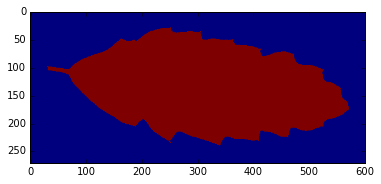

In [3]:
# Take a look at the image.

imagePlot = plt.imshow(pixelData)
plt.show()

In [4]:
# Take a look at the values in the image.

valuesInfo = np.unique(pixelData, return_counts = True)

valuesInfo

(array([  0,   1, 254, 255], dtype=uint32),
 array([94097,   187,   161, 68426], dtype=int64))

In [52]:
# Try segmenting the image into parts and applying linear fits to obtain geometric information about the boundary.

# Make output of image fitting.

fitted = np.zeros(pixelData.shape)

# Divide up each axis into segments.

nSegments = 20

dHeight = int(imHeight /  nSegments)
dWidth = int(imWidth / nSegments)

# Set up sample x and y values

xSamples = np.array(range(0, dWidth)).reshape(1, dWidth)
xSamples = np.repeat(xSamples, dHeight, axis = 0)
xSamples = xSamples.flatten()

ySamples = np.array(range(0, dHeight)).reshape(1, dHeight)
ySamples = np.repeat(ySamples, dWidth, axis = 0)
ySamples = ySamples.T.flatten()

depSamples = np.array([xSamples, ySamples]).T

# Set up image model and fit each segment

imageModel = make_pipeline(PolynomialFeatures(3), LinearRegression())

for i0 in range(0,imHeight - dHeight,dHeight):
    for j0 in range(0, imWidth - dWidth, dWidth):
        imageSample = pixelData[i0:i0+dHeight, j0:j0+dWidth].flatten()
        imageModel.fit(depSamples, imageSample)
        prediction = imageModel.predict(depSamples)
        fitted[i0:i0+dHeight, j0:j0+dWidth] = prediction.reshape(dHeight, dWidth)
        

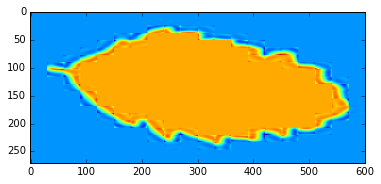

In [53]:
# Plot the fitted image

imagePlot = plt.imshow(fitted)
plt.show()

In [41]:
# Take a look at the values in the image.
fittedInt = [[int(value) for value in row] for row in fitted]

valuesInfo = np.unique(fittedInt, return_counts = True)

valuesInfo

(array([-164, -163, -153, -150, -147, -146, -142, -137, -135, -132, -130,
        -129, -127, -125, -123, -122, -121, -118, -117, -116, -114, -112,
        -111, -108, -107, -106, -105, -104, -103, -102, -101,  -99,  -98,
         -97,  -96,  -95,  -94,  -93,  -92,  -91,  -90,  -89,  -88,  -87,
         -86,  -85,  -84,  -83,  -82,  -81,  -80,  -79,  -78,  -77,  -76,
         -75,  -74,  -73,  -72,  -71,  -70,  -69,  -68,  -67,  -66,  -65,
         -64,  -63,  -62,  -61,  -60,  -59,  -58,  -57,  -56,  -55,  -54,
         -53,  -52,  -51,  -50,  -49,  -48,  -47,  -46,  -45,  -44,  -43,
         -42,  -41,  -40,  -39,  -38,  -37,  -36,  -35,  -34,  -33,  -32,
         -31,  -30,  -29,  -28,  -27,  -26,  -25,  -24,  -23,  -22,  -21,
         -20,  -19,  -18,  -17,  -16,  -15,  -14,  -13,  -12,  -11,  -10,
          -9,   -8,   -7,   -6,   -5,   -4,   -3,   -2,   -1,    0,    1,
           2,    3,    4,    5,    6,    7,    8,    9,   10,   11,   12,
          13,   14,   15,   16,   17, 